In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
import scipy as stats
import statsmodels.api as sm


Descriptive statistics:
             taxrev    taxrate            pop
count     98.000000  98.000000      98.000000
mean    4477.341309  25.208162   56475.887755
std     5251.175293   0.908003   62925.301713
min      211.228409  22.799999    1969.000000
25%     2466.702271  24.799999   29997.750000
50%     3317.848633  25.299999   43475.000000
75%     4786.060913  25.700001   59733.000000
max    44170.335938  27.799999  528208.000000

Median values:
taxrev      3317.848633
taxrate       25.299999
pop        43475.000000
dtype: float64


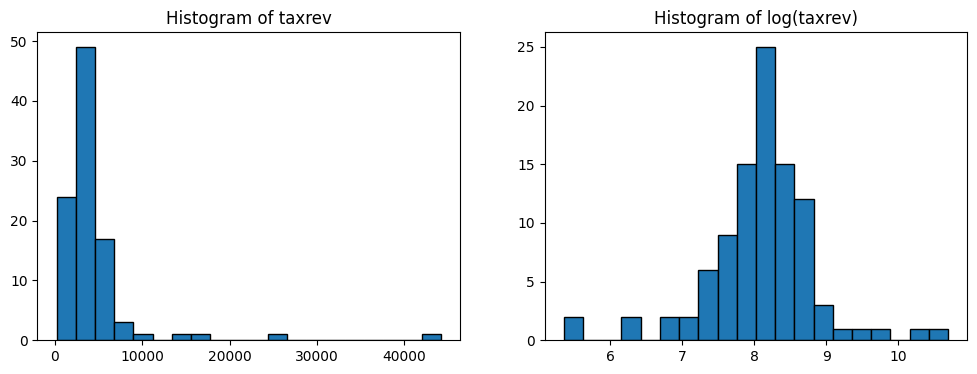

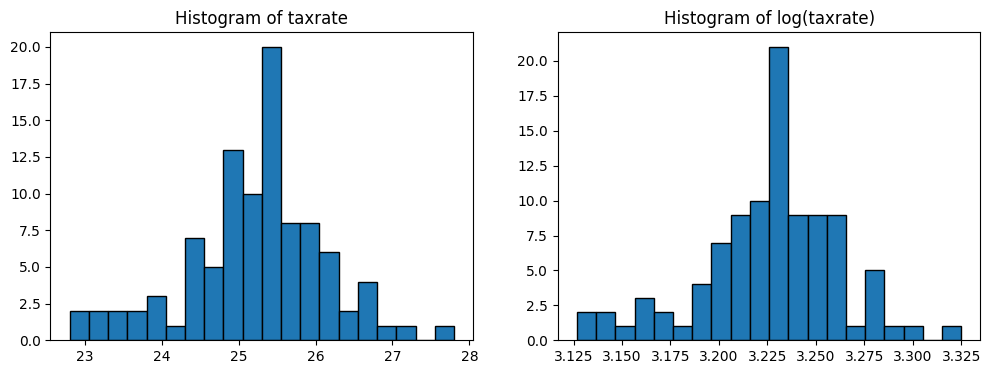

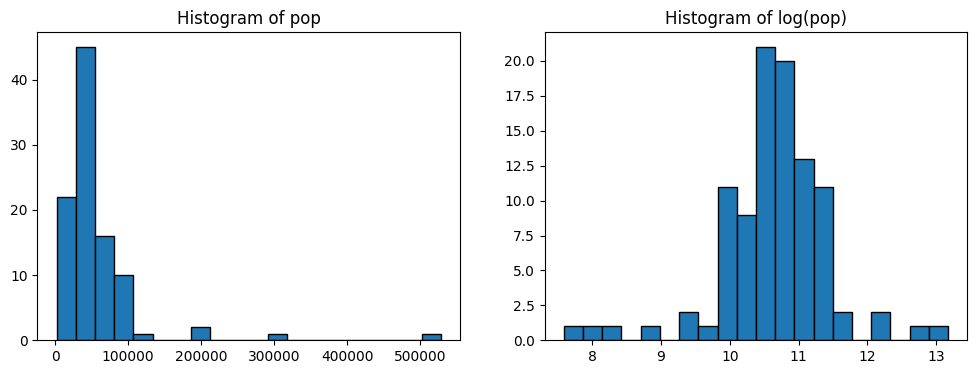

In [11]:
df = pd.read_stata("A1_kommune.dta")

print("Descriptive statistics:")
print(df[["taxrev", "taxrate", "pop"]].describe())

print("\nMedian values:")
print(df[["taxrev", "taxrate", "pop"]].median())

variables = ["taxrev", "taxrate", "pop"]

for var in variables:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    axes[0].hist(df[var].dropna(), bins=20, edgecolor="black")
    axes[0].set_title(f"Histogram of {var}")
    
    positive_vals = df[var][df[var] > 0]
    axes[1].hist(np.log(positive_vals), bins=20, edgecolor="black")
    axes[1].set_title(f"Histogram of log({var})")
    
    plt.show()

In [14]:
# OLS estimation vha OLS fra statsmodels
df["log_taxrev"] = np.log(df["taxrev"])

X = df[["taxrate"]]            
X = sm.add_constant(X) 

y = df['log_taxrev']


model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_taxrev   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.818
Date:                Mon, 15 Sep 2025   Prob (F-statistic):             0.0965
Time:                        15:24:22   Log-Likelihood:                -111.12
No. Observations:                  98   AIC:                             226.2
Df Residuals:                      96   BIC:                             231.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6982      2.143      5.459      0.0